In [2]:
import pandas as pd
import numpy as np


In [1]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [3]:
!wget https://adm2023.s3.amazonaws.com/lighter_books.json

--2023-11-06 20:02:09--  https://adm2023.s3.amazonaws.com/lighter_books.json
Resolving adm2023.s3.amazonaws.com (adm2023.s3.amazonaws.com)... 52.216.137.124, 3.5.21.159, 52.216.213.49, ...
Connecting to adm2023.s3.amazonaws.com (adm2023.s3.amazonaws.com)|52.216.137.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16123393395 (15G) [application/json]
Saving to: ‘lighter_books.json’

lighter_books.json  100%[===================>]  15.02G  39.7MB/s    in 6m 1s   

2023-11-06 20:08:11 (42.6 MB/s) - ‘lighter_books.json’ saved [16123393395/16123393395]



In [4]:
!wget https://adm2023.s3.amazonaws.com/lighter_authors.json

--2023-11-06 20:08:11--  https://adm2023.s3.amazonaws.com/lighter_authors.json
Resolving adm2023.s3.amazonaws.com (adm2023.s3.amazonaws.com)... 54.231.128.57, 52.217.93.172, 16.182.107.225, ...
Connecting to adm2023.s3.amazonaws.com (adm2023.s3.amazonaws.com)|54.231.128.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 549013002 (524M) [application/json]
Saving to: ‘lighter_authors.json’

lighter_authors.jso 100%[===================>] 523.58M  41.8MB/s    in 12s     

2023-11-06 20:08:23 (43.7 MB/s) - ‘lighter_authors.json’ saved [549013002/549013002]



## [RQ1] Exploratory Data Analysis (EDA) - Before working on your research questions, you should provide meaningful statistical summaries through visualizations and tabular tools to understand your data.

### Analyze the data

First thing first, let's load the two datasets.

In [5]:
data_auth = pd.read_json('/content/lighter_authors.json',lines=True)
data_auth.drop(["about","image_url"],axis=1,inplace=True)

In [6]:
data_books = pd.read_json('/content/lighter_books.json',lines=True,chunksize=100000)
TOTAL_DF = pd.DataFrame()
for chunk in data_books:  #drop columns that are not useful or that are redundant
    PARTIAL_DATA = chunk[['id', 'title', 'authors', 'author_name', 'author_id', 'work_id','language', 'average_rating', 'rating_dist',
       'ratings_count', 'text_reviews_count', 'publication_date',
       'original_publication_date', 'format','num_pages']]
    TOTAL_DF = pd.concat([TOTAL_DF,PARTIAL_DATA])


As we can see, TOTAL_DF must be loaded in chunks since it's nearly impossible to read it in one go. Also, useless columns are dropped since they don't add anything to the data analysis. Columns containg descriptions or url (in general "strings") are extremely heavy on the memory, and unless we are performing operations on such columns we can drop them.

In [7]:
data_auth.head()

,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,fans_count
0,2862064,4.19,62681,"[3078186, 135328, 1877624, 74123, 3078120, 104...","[386162, 13, 8695, 8694, 6091075, 365, 569429,...",106,4,Douglas Adams,male,19826
1,1417316,4.02,84176,"[613469, 2305997, 940892, 2611786, 7800569, 31...","[9791, 21, 28, 24, 7507825, 27, 10538, 25, 26,...",75,7,Bill Bryson,male,16144
2,56159,4.53,352,"[17150, 808427, 20487307, 90550, 25460625, 171...","[349254, 15222, 14833682, 15221, 18126815, 152...",14,10,Jude Fisher,female,60
3,3302,3.79,480,"[4417, 14300808, 14780, 3796968, 44703121, 103...","[40, 9416484, 12482, 3753106, 26889789, 104764...",45,12,James Hamilton-Paterson,male,72
4,7979,3.60,772,"[13330815, 19109351, 42306244, 72694240, 26291...","[8466327, 15739968, 22756778, 51026133, 260451...",61,14,Mark Watson,male,179


In [8]:
TOTAL_DF.head()

,id,title,authors,author_name,author_id,work_id,language,average_rating,rating_dist,ratings_count,text_reviews_count,publication_date,original_publication_date,format,num_pages
0,2,Harry Potter and the Order of the Phoenix (Har...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2809203,eng,4.50,5:1674064|4:664833|3:231195|2:41699|1:16215|to...,2628006,44716,2004-09,2003-06-21,Paperback,870
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,4640799,eng,4.48,5:4801606|4:1681521|3:623286|2:145898|1:125040...,7377351,116930,2003-11-01,1997-06-26,Hardcover,309
2,4,Harry Potter and the Chamber of Secrets (Harry...,None,J.K. Rowling,1077326,6231171,eng,4.43,5:1690166|4:781011|3:313727|2:54687|1:15453|to...,2855044,55286,2003-11-01,1998-07-02,Hardcover,352
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2402163,eng,4.57,5:1994597|4:696545|3:212678|2:28915|1:13959|to...,2946694,58023,2004-05-01,1999-07-08,Mass Market Paperback,435
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,3046572,eng,4.56,5:1808039|4:663849|3:193604|2:27759|1:12425|to...,2705676,48637,2002-09-28,2000-07-08,Paperback,734


In [9]:
data_auth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351767 entries, 0 to 351766
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ratings_count       351767 non-null  int64  
 1   average_rating      351767 non-null  float64
 2   text_reviews_count  351767 non-null  int64  
 3   work_ids            351767 non-null  object 
 4   book_ids            351767 non-null  object 
 5   works_count         351767 non-null  int64  
 6   id                  351767 non-null  int64  
 7   name                351767 non-null  object 
 8   gender              351767 non-null  object 
 9   fans_count          351767 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 26.8+ MB


In [10]:
TOTAL_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027431 entries, 0 to 7027430
Data columns (total 15 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   id                         int64  
 1   title                      object 
 2   authors                    object 
 3   author_name                object 
 4   author_id                  int64  
 5   work_id                    int64  
 6   language                   object 
 7   average_rating             float64
 8   rating_dist                object 
 9   ratings_count              int64  
 10  text_reviews_count         int64  
 11  publication_date           object 
 12  original_publication_date  object 
 13  format                     object 
 14  num_pages                  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 804.2+ MB


Let's now take a look at the NAN values, if any

In [11]:
(TOTAL_DF.isnull().sum()/len(TOTAL_DF))*100

id                            0.000000
title                         0.000000
authors                      76.254253
author_name                   0.000000
author_id                     0.000000
work_id                       0.000000
language                      0.000000
average_rating                0.000000
rating_dist                   0.000000
ratings_count                 0.000000
text_reviews_count            0.000000
publication_date              0.000000
original_publication_date     0.000000
format                        0.000000
num_pages                     0.000000
dtype: float64

More than 76% of the "authors" are missing, but that column lists every author that has contributed to a specific book, so the percentage makes sense if we think that usually just one person works on a book

### Statistics summary

In [48]:
data_auth.describe()

,ratings_count,average_rating,text_reviews_count,works_count,id,fans_count
count,3.517670e+05,351767.000000,351767.000000,3.517670e+05,3.517670e+05,351767.000000
mean,4.770586e+03,3.651194,330.993243,2.593714e+01,7.751861e+06,111.615731
std,9.769395e+04,1.211482,3857.539191,3.066083e+03,6.578409e+06,2661.018139
min,-4.100000e+01,-31.000000,0.000000,0.000000e+00,4.000000e+00,-33.000000
25%,6.000000e+00,3.600000,1.000000,2.000000e+00,1.535315e+06,1.000000
50%,3.900000e+01,3.950000,8.000000,6.000000e+00,6.470396e+06,4.000000
75%,3.100000e+02,4.250000,53.000000,1.500000e+01,1.434041e+07,20.000000
max,2.700375e+07,5.000000,608956.000000,1.775176e+06,2.124802e+07,766035.000000


In [49]:
TOTAL_DF.describe()

,id,author_id,work_id,average_rating,ratings_count,text_reviews_count
count,7.027431e+06,7.027431e+06,7.027431e+06,7.027431e+06,7.027431e+06,7.027431e+06
mean,1.326720e+07,1.977793e+06,1.398533e+07,3.306188e+00,1.945861e+04,6.417258e+02
std,7.637922e+06,3.210660e+06,1.535637e+07,1.435734e+00,1.609008e+05,4.169806e+03
min,2.000000e+00,4.000000e+00,6.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.937444e+06,3.368200e+04,1.564717e+06,3.360000e+00,3.000000e+00,0.000000e+00
50%,1.422732e+07,2.499460e+05,6.759579e+06,3.810000e+00,4.500000e+01,5.000000e+00
75%,1.953942e+07,3.239281e+06,2.198795e+07,4.080000e+00,7.710000e+02,6.400000e+01
max,2.552102e+07,2.124802e+07,8.972161e+07,5.000000e+00,7.400639e+06,1.745240e+05


In [50]:
USABLE_DF = TOTAL_DF.copy() #create a copy of the dataset


In data_auth there's something wrong with the min, so we need to drop some values

In [51]:
data_auth = data_auth.loc[(data_auth["ratings_count"]>=0) & (data_auth["average_rating"] >=1) & (data_auth["fans_count"] >=0)]

The dataset will be cleaned more during each and every question

## [RQ2] Let’s finally dig into this vast dataset, retrieving some vital information:

Plot the number of books for each author in descending order

<Axes: xlabel='name'>

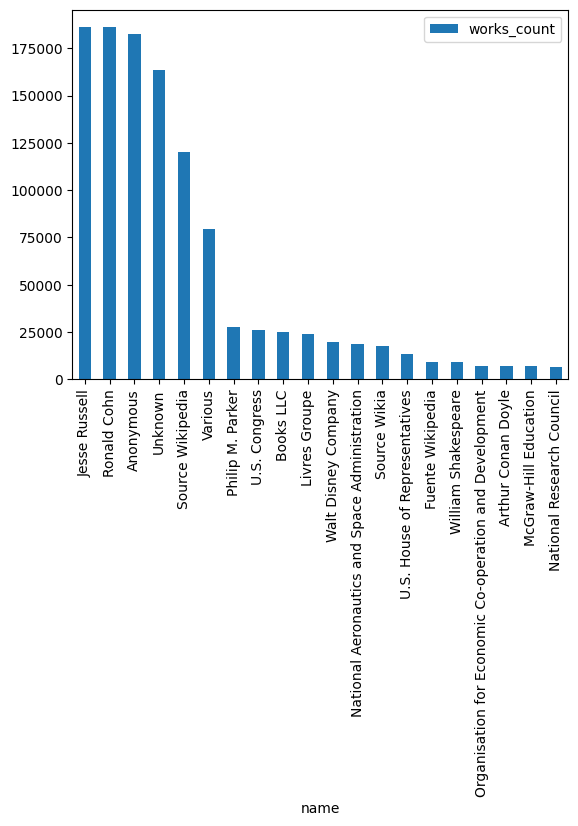

In [52]:
nb_books = data_auth[["name","works_count"]]
nb_books = nb_books.sort_values(by="works_count",ascending=False).iloc[1:21]
nb_books.plot(x="name",kind="bar")

As we can see, not every author is a person(some are Institutions). Also, we printed the first 20 in descending order to give an idea of the scale. Technically the first author was "NOT A BOOK" with more than 1.5 million books, but as specified in the "about" section, "this profile was created to segregate those items which have ISBNs or ASINs but are not considered part of our catalog"

Which book has the highest number of reviews?

In [53]:
USABLE_DF = USABLE_DF.loc[USABLE_DF["average_rating"] >=1]

In [54]:
rating_counts_book = USABLE_DF[["title","ratings_count"]]
rating_counts_book = rating_counts_book.sort_values(by="ratings_count",ascending=False).iloc[0][0]
print("The book with the highest number of reviews is", rating_counts_book)

The book with the highest number of reviews is Harry Potter und der Stein der Weisen (Harry Potter,#1)


Which are the top ten and ten worst books concerning the average score?

In [55]:
Highest_score = USABLE_DF.sort_values(by="average_rating",ascending=False).iloc[:10]
Lowest_score = USABLE_DF.sort_values(by="average_rating").iloc[:10]
#Highest_score[["name","average_score"]].
print(Highest_score[["title","average_rating"]])
print(Lowest_score[["title","average_rating"]])

                                                     title  average_rating
2877874                                         Sin Killer             5.0
3667969                                          White Oak             5.0
318798   Bratty Brothers and Selfish Sisters: All about...             5.0
5340272                        The Princess and the Popper             5.0
1604861                                             D.N.A.             5.0
6084871                                   Jahrhundertspiel             5.0
6084876                                     Ties that bind             5.0
6084885                                      Rund der Hund             5.0
5340260                              Medieval Tile Designs             5.0
1604840  Life Application Bible: New Testament: The Liv...             5.0
                                                     title  average_rating
2524320                            Sensual Phrase Chapters             1.0
5739507       Successful 

As we can see, 1 and 5 ratings are present and taken into consideration

Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.

<Axes: ylabel='language'>

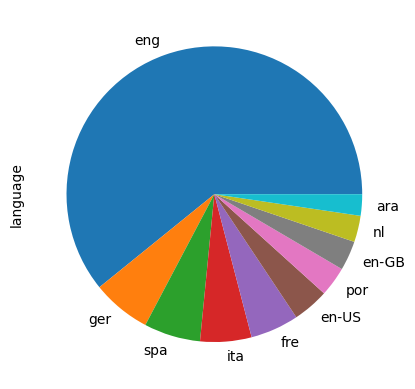

In [56]:
languages = USABLE_DF.loc[USABLE_DF["language"]!='',:]
languages = languages["language"]
languages.value_counts()[:10].plot.pie()

With a pie chart it's easy to see that the majority of books are written in english

How many books have more than 250 pages?

In [57]:
Number_books = USABLE_DF.loc[USABLE_DF["num_pages"]!='',:]  #with this, we filter out everything that is not a number

filtered = Number_books[Number_books["num_pages"] > 250]
print("The number of books with over 250 pages is",filtered["num_pages"].count())

The number of books with over 250 pages is 1651330


Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books)

<Axes: xlabel='name'>

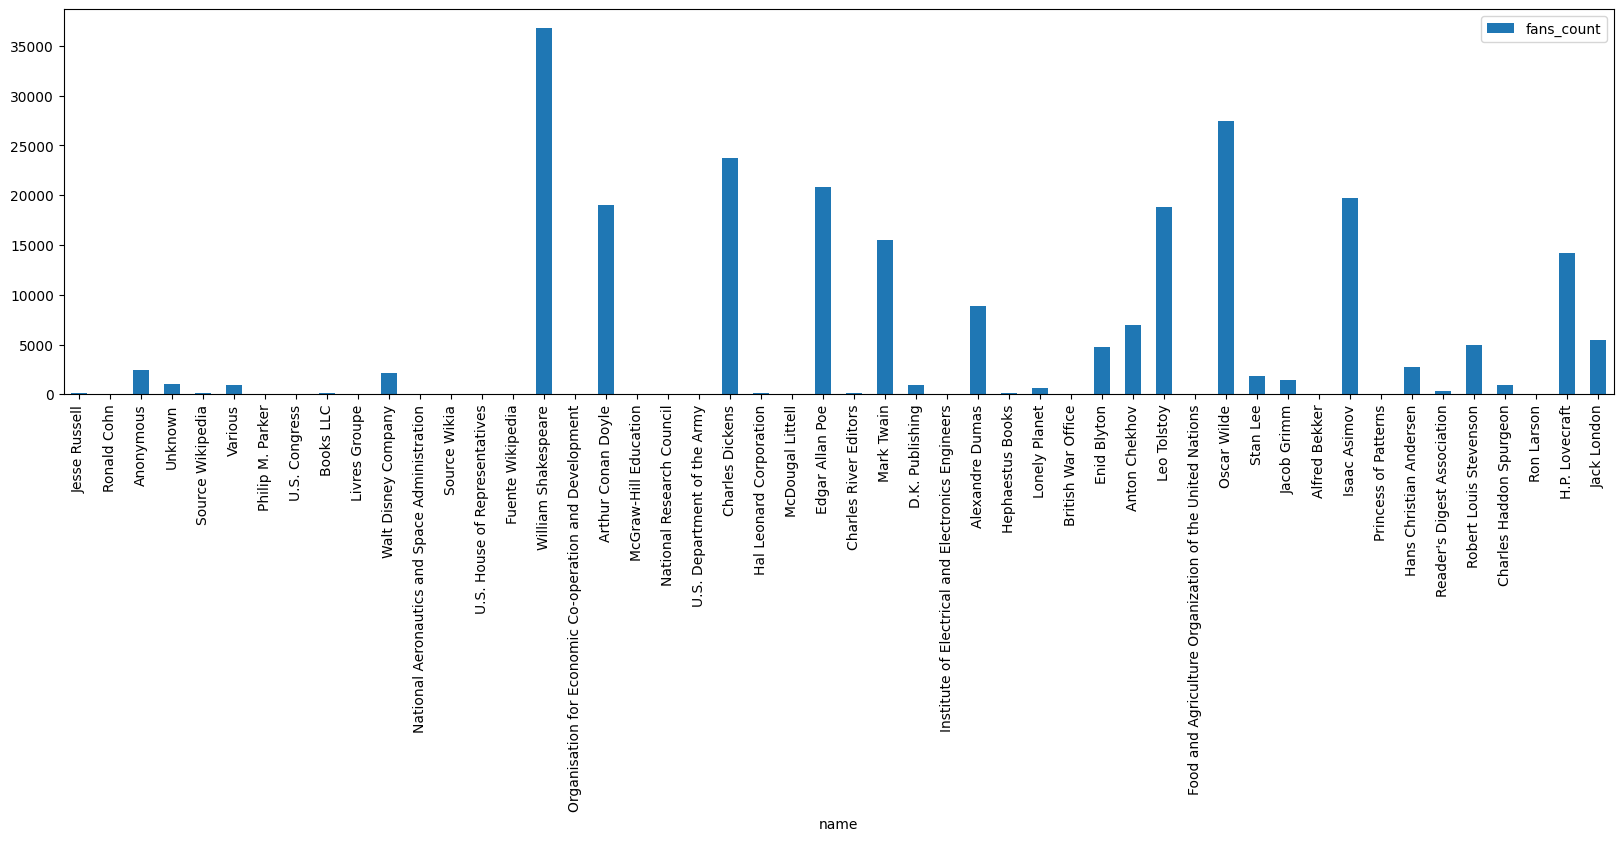

In [58]:
p_o = data_auth[["name","works_count","fans_count"]]
Prolific_authors = p_o.sort_values(by="works_count",ascending=False).iloc[1:51]
Prolific_authors[["name","fans_count"]].plot(x="name",y="fans_count",kind="bar",figsize=(20,5))


Even though they have more books, we notice that the amount of fans of "U.S Congress" is way less than (for instance) "William Shakespeare"

## [RQ3] Let’s have a historical look at the dataset!

Write a function that takes as input a year and returns as output the following information:

   - The number of books published that year.

   - The total number of pages written that year.

   - The most prolific month of that year.

   - The longest book written that year.





In [59]:
TOTAL_DF['num_pages'] = TOTAL_DF['num_pages'].replace("", np.nan) # turns the "" values into nan in the column num_pages
TOTAL_DF['num_pages'] = TOTAL_DF['num_pages'].astype('Int64') # turns the STRING MM into INT
TOTAL_DF['average_rating'] = TOTAL_DF['average_rating'].replace(0, np.nan) # turns the 0 values into nan in the column average_rating

In [60]:
import calendar
def year_info(year):
    year_df = TOTAL_DF[TOTAL_DF['year'] == year]
    num_books = year_df['title'].count() # number of books published that year
    total_pages = year_df['num_pages'].astype('Int64').fillna(0).sum() # total number of pages written that year considering NA as 0
    most_prolific_month = year_df['month'].value_counts().idxmax() #most prolific month of that year.
    longest_book = year_df.loc[year_df['num_pages'].idxmax()]['title'] # longest book written that year.
    month_name = calendar.month_name[most_prolific_month]

    print(f"In the year {year} a total of {num_books} books have been published.\n The total number of pages written in that year is {total_pages}, the most prolific month was {month_name}. \n Lastly, the longest book was '{longest_book}'")

In [61]:
TOTAL_DF = TOTAL_DF.loc[TOTAL_DF["publication_date"]!='',:] #we take all the rows besides the empty ones
#only YYYY,YYY,YY,Y,YYYY-MM-DD,YYY-MM-DD,YYYY-MM, YYY-MM
TOTAL_DF = TOTAL_DF[TOTAL_DF.publication_date.str.contains(r'^\d{1}$|^\d{2}$|^\d{3}$|^\d{4}$|^\d{4}-\d{2}-\d{2}$|^\d{3}-\d{2}-\d{2}$|^\d{4}-\d{2}$|^\d{3}-\d{2}$')]

In [62]:
TOTAL_DF['year'] = TOTAL_DF['publication_date'].str.split('-').str[0] #take only the years out of the Regex
TOTAL_DF['year'] = TOTAL_DF['year'].astype(int) # turns the STRING YYYY into INT
TOTAL_DF = TOTAL_DF[TOTAL_DF['year'] < 2023] #takes the values before 2023

In [63]:
TOTAL_DF['month'] = TOTAL_DF['publication_date'].str.split('-').str[1] #take only the months out of the Regex
TOTAL_DF['month'] = TOTAL_DF['month'].astype('Int64') # turns the STRING MM into INT
TOTAL_DF = TOTAL_DF[(TOTAL_DF['month'] >= 1) & (TOTAL_DF['month'] <= 12)] #takes the values between 1 and 12

Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row. Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years.

Ask ChatGPT or any other LLM chatbot tool to implement this function and compare your work with the one the bot gave you as an answer. Does the chatbot implementation work? Please test it out and verify the correctness of the implementation, explaining the process you followed to prove it.

In [64]:
#Here is the same function as before but without the long print and just a return
def year_info(year):
    year_df = TOTAL_DF[TOTAL_DF['year'] == year]
    num_books = year_df['title'].count() # number of books published that year
    total_pages = year_df['num_pages'].astype('Int64').fillna(0).sum() # total number of pages written that year considering NA as 0
    most_prolific_month = year_df['month'].value_counts().idxmax() #most prolific month of that year.
    longest_book = year_df.loc[year_df['num_pages'].idxmax()]['title'] # longest book written that year.

    return num_books, total_pages, most_prolific_month, longest_book

In [65]:
def add_to_df():
    n = int(input("How many years would you like to write? "))
    data_dict = {}
    for i in range(n):
        new_year = int(input("Please give me a year: "))
        year_data = year_info(new_year)
        data_dict[new_year] = {
            'num_books': year_data[0],
            'total_pages': year_data[1],
            'most_prolific_month': year_data[2],
            'longest_book': year_data[3]
        }
    new_df = pd.DataFrame.from_dict(data_dict, orient='index') #create a dataframe from the dictionary
    new_df.index.name = 'Year' #name of the index is 'Year'
    print(f"Congrats, you created this DataFrame:\n{new_df}\n\n Here is head(10):\n{new_df.head(10)}\n\n And here is the tail(10): \n{new_df.tail(10)}")

In [ ]:
add_to_df()


## [RQ4] Quirks questions about consistency. In most cases, we will not have a consistent dataset, and the one we are dealing with is no exception. So, let's enhance our analysis.

- You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?


In [67]:
import difflib


def remove_similar_names(data_auth):                                         # Using difflib we can compute the difference between two hashable strings. The higher the ratio, the
                                                                             # more similar the strings are. If the threshold is extremely high (95% in this case), then the name is
                                                                             # pretty much the same. By creating a list of similar name, we can drop that list from the original df.
    similar_names = set()
    Unique = data_auth["name"].drop_duplicates().dropna().tolist()


    for name1, name2 in zip(Unique, Unique[1:]):
       # id1 = USABLE_DF.loc[USABLE_DF.author_name==name1].author_id.values[0]
       # id2 = USABLE_DF.loc[USABLE_DF.author_name==name2].author_id.values[0]

        similarity = difflib.SequenceMatcher(None, name1, name2).ratio()

        if (similarity > 0.95):
            similar_names.add(name1)
            similar_names.add(name2)

    filtered_data = data_auth[~data_auth['name'].isin(similar_names)]

    return filtered_data

data_auth = remove_similar_names(data_auth)



The answer is no. There are eponymous in our dataset

- Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.

In [68]:
def Information(authors_id_list):   #author list in input
    author_info = {}
    for ids in authors_id_list:
        infor = USABLE_DF[USABLE_DF.author_id==ids]  #filter only the id that we need from the USABLE_DF, and then create a list with the book names associated to that id
        infor=infor["title"].to_list()
        author_info[ids] = infor #create the dictionary with id as key and list as value
    return author_info

test = Information([1077326])  #Just a test to check if works
print(test)

{1077326: ['Harry Potter and the Order of the Phoenix (Harry Potter, #5)', "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)", 'Harry Potter and the Chamber of Secrets (Harry Potter, #2)', 'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)', 'Harry Potter and the Goblet of Fire (Harry Potter, #4)', 'The Harry Potter Collection (Harry Potter, #1-6)', 'Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)', 'Harry Potter Collection (Harry Potter, #1-6)', 'Harry Potter Schoolbooks Box Set: Two Classic Books from the Library of Hogwarts School of Witchcraft and Wizardry', 'Harry Potter and the Half-Blood Prince (Harry Potter, #6)', 'Harry Potter et la Chambre des Secrets (Harry Potter, #2)', 'Harry Potter y la piedra filosofal (Harry Potter, #1)', 'Harry Potter Y La Piedra Filosofal (Harry Potter, #1)', "Harry Potter and the Philosopher's Stone", 'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)', '混血王子的背叛 (哈利波特, #6)', '火盃的考驗 (哈利波特, #4)', 'Harry Potter y la pi

- What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?

In [69]:
Books_avg = USABLE_DF.sort_values(by="average_rating",ascending=False).iloc[:20] #Sort by average rating and select the top 20

def sorter(x):          #Use a sorter function to compute the string lenght
    return sorted(x, key=len, reverse=True)

Books_avg["title"].apply(sorter).str.len().sort_values(ascending=False) #apply the sorter function defined before, compute the string lenght and then sort everything.

1106403    66
318798     62
1604840    55
1604794    47
5340239    44
1604815    39
6386361    33
2734565    30
5340272    27
1604797    23
5340260    21
6084871    16
6084876    14
6662098    13
6084885    13
1604809    12
6386378    10
2877874    10
3667969     9
1604861     6
Name: title, dtype: int64

In [70]:
Books_avg = USABLE_DF.sort_values(by="average_rating",ascending=False) #call Boooks_avg a second time, but on the entire dataset
Books_avg["title"].apply(sorter).str.len().sort_values(ascending=False).iloc[:10] #As we can see it's not the longest title (and the top 10 is truncated to 255)


3130026    255
3255694    255
3242976    255
5824179    255
3243055    255
3243056    255
5819152    255
4628083    255
3244882    255
3244997    255
Name: title, dtype: int64

- What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.


In [71]:
Books_avg["title"].apply(sorter).str.len().sort_values(ascending=True).iloc[:10]

2551271    0
3004231    0
2455300    0
3031872    0
3031871    0
2492844    1
3409607    1
56483      1
710631     1
863545     1
Name: title, dtype: int64

As we can see, the shortest book title lenght is 0. This is can happen if no title is provided for a book. This means that books with title lenght 1 are the shortest.

# [RQ5] We can consider the authors with the most fans to be influential. Let’s have a deeper look.

*   Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?




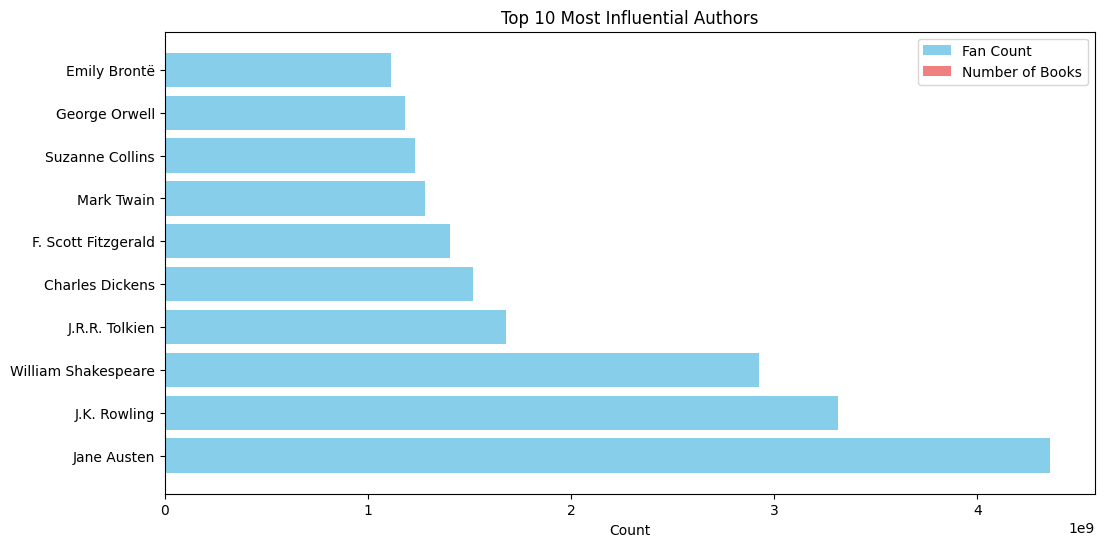

The most influential author is: Jane Austen


In [72]:
import matplotlib.pyplot as plt

# Group by author and calculate fan count and number of books
author_group = TOTAL_DF.groupby('author_name').agg({'ratings_count': 'sum', 'id': 'count'}).reset_index()
author_group.rename(columns={'ratings_count': 'total_fan_count', 'id': 'number_of_books'}, inplace=True)

# Sorting the authors in descending order
author_group = author_group.sort_values(by=['total_fan_count', 'number_of_books'], ascending=False)

top_10_authors = author_group.head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_10_authors['author_name'], top_10_authors['total_fan_count'], color='skyblue', label='Fan Count')
plt.barh(top_10_authors['author_name'], top_10_authors['number_of_books'], color='lightcoral', label='Number of Books')
plt.xlabel('Count')
plt.title('Top 10 Most Influential Authors')
plt.legend()
plt.show()

most_influential_author = top_10_authors.iloc[0]
print("The most influential author is:", most_influential_author['author_name'])


The most influential author is: Jane Austen



*   Have they published any series of books? If any, extract the longest series name among these authors.


---







In [73]:
# the list of top 10 influential authors
top_10_author_names = top_10_authors['author_name'].tolist()

# Filtering so that we could include books authored by the top 10 authors
top_10_author_books = TOTAL_DF[TOTAL_DF['author_name'].isin(top_10_author_names)]

series_names = top_10_author_books['title'].str.extract(r'\((.*?)\)', expand=False).dropna()
if not series_names.empty:
    longest_series_name = series_names[series_names.str.len().idxmax()]
    print("The longest series name among the top 10 authors is:", longest_series_name)
else:
    print("None of the top 10 authors have published a series of books.")

The longest series name among the top 10 authors is: L'Abbaye de Northanger - Le Coeur et la Raison - Orgueil et préjugé. Appendices : Lady Susan - Les Watson. Oeuvres de jeunesse : Amour et amitié - Histoire de l'Angleterre



The longest series name among the top 10 authors is:

"L'Abbaye de Northanger - Le Coeur et la Raison - Orgueil et préjugé. Appendices : Lady Susan - Les Watson. Oeuvres de jeunesse : Amour et amitié - Histoire de l'Angleterre"



*  How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it.




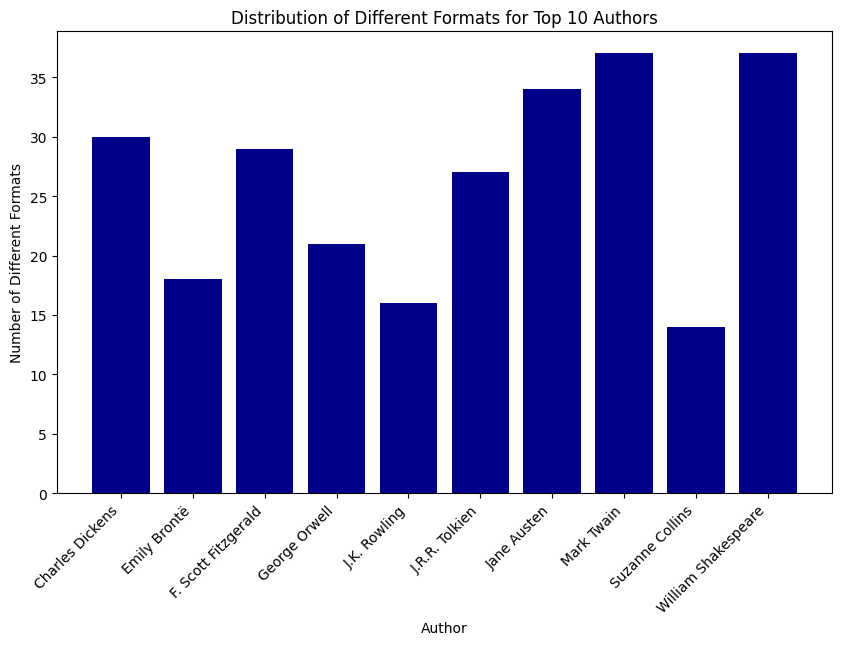

Number of authors published in different formats: 10


In [74]:
top_10_author_books = TOTAL_DF[TOTAL_DF['author_name'].isin(top_10_author_names)]

# Counting the number of unique formats for each author
formats_count = top_10_author_books.groupby('author_name')['format'].nunique().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(formats_count['author_name'], formats_count['format'], color='darkblue')
plt.xlabel('Author')
plt.ylabel('Number of Different Formats')
plt.title('Distribution of Different Formats for Top 10 Authors')
plt.xticks(rotation=45, ha='right')
plt.show()

# Counting the number of authors published in different formats
authors_with_multiple_formats = (formats_count['format'] > 1).sum()

print("Number of authors published in different formats:", authors_with_multiple_formats)




*   Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.” You may want to have a look at the following recommended readings:

- https://bhm.scholasticahq.com/article/38021

- https://priyanka-ddit.medium.com/how-to-deal-with-imbalanced-dataset-86de86c49

- https://compass.onlinelibrary.wiley.com/doi/10.1111/soc4.12962



Here's a prompt generated by ChatGPT:

"Can you provide information and insights on the topic of structural bias in data analysis? I'm interested in understanding what structural bias is, how it can affect data analysis, and best practices for identifying and mitigating bias in datasets and analysis processes."

Response:
"Structural bias in data analysis refers to biases that are inherent in the data, data collection processes, or analytical methods, which can lead to unfair or inaccurate results. This bias can result from historical inequalities, data collection methods, or the framing of research questions. It is essential to recognize and address structural bias to ensure fair and unbiased analysis.

Structural bias can manifest in various ways, such as underrepresentation of certain groups in the dataset, sampling biases, or biases in algorithmic decision-making. This can lead to unfair outcomes, such as discrimination or inequities in decision-making.

To identify and mitigate structural bias, data analysts should:

Be aware of potential biases in data sources and collection methods.
Use diverse and representative datasets whenever possible.
Implement fairness-aware algorithms and models to reduce bias.
Regularly assess the impact of bias on analysis outcomes.
Addressing structural bias is crucial for ethical and fair data analysis and decision-making."

# [RQ6] For this question, consider the top 10 authors concerning the number of fans again.



*   Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?





*   For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?



<ipython-input-75-b9d88fc8cb7a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_author_books['publication_date'] = pd.to_datetime(top_10_author_books['publication_date'], errors='coerce')


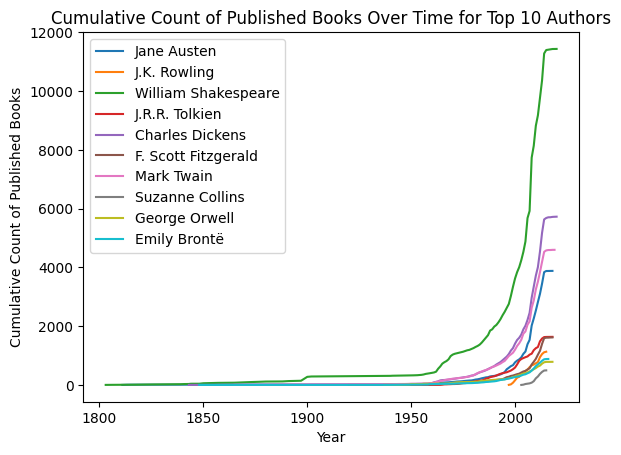

In [75]:
top_10_author_books = TOTAL_DF[TOTAL_DF['author_name'].isin(top_10_author_names)]

# Converting the date column to a datetime object
top_10_author_books['publication_date'] = pd.to_datetime(top_10_author_books['publication_date'], errors='coerce')

# Create a plot for each author
for author_name in top_10_author_names:
    author_data = top_10_author_books[top_10_author_books['author_name'] == author_name]

    # Group by year and count the number of books published each year
    yearly_counts = author_data['publication_date'].dt.year.value_counts().sort_index().cumsum()
    plt.plot(yearly_counts.index, yearly_counts.values, label=author_name)

plt.xlabel('Year')
plt.ylabel('Cumulative Count of Published Books')
plt.legend()
plt.title('Cumulative Count of Published Books Over Time for Top 10 Authors')
plt.show()


To construct a graph showing the number of books published by each author up to a certain year and to assess whether these authors are contemporaries of each other, as well as to identify periods with higher levels of output, the following steps can be followed:

Filter the dataset to include books by authors of interest.
Group the data by author and year of publication to count the number of books published by each author in each year.
Create a cumulative count of the number of books published for each author.
Graph the cumulative count of books for each author over time.

## [RQ7] Estimating probabilities is a core skill for a data scientist: show us your best!




- Estimate the probability that a book has over 30% of the ratings above 4.


In [76]:
import re

usable_ratings = USABLE_DF.loc[USABLE_DF["ratings_count"]>0]  #To avoid division by zero

ratings = usable_ratings["rating_dist"]
count = int()

regex_pattern = r'(?<=\:)[0-9]+' #positive lookbehind for special character ":" and number identification
for rating in ratings:
    matched_list = re.findall(regex_pattern,rating)
    if len(matched_list) == 6:
        desired_rating_percentage = round(((int(matched_list[0])+int(matched_list[1]))/int(matched_list[5]))*100,2) #first and second element of the list are 5 and 4 rating
    if desired_rating_percentage > 30:
        count+=1

print("The percentage of books that satisfy the request is",round(count/len(ratings)*100,2) )

#Read how the ratings are distributed, and the input should be something like 5:1000 | 4: 200 | 3: 100 | 2: 200 | 1: 50. Let us filter the number of rating
#that are >=4 (so rating_45 = sum(rating 4 and 5)). Compute the percentage (rating_45 / total_ratings)*100 and that is for just one book. Compute it for every book and filter
#how many books verify this condition. To estimate the final probabilty: (#number of books that verify the condition / #total books)*100

The percentage of books that satisfy the request is 94.1


- Estimate the probability that an author publishes a new book within two years from its last work.


In [77]:

USABLE_DF = USABLE_DF.loc[USABLE_DF["publication_date"]!='',:] #we take all the rows besides the empty ones
#only YYYY,YYY,YY,Y,YYYY-MM-DD,YYY-MM-DD,YYYY-MM, YYY-MM
USABLE_DF = USABLE_DF[USABLE_DF.publication_date.str.contains(r'^\d{1}$|^\d{2}$|^\d{3}$|^\d{4}$|^\d{4}-\d{2}-\d{2}$|^\d{3}-\d{2}-\d{2}$|^\d{4}-\d{2}$|^\d{3}-\d{2}$')]
#add a new column FROM RQ3 with the years
USABLE_DF['year'] = USABLE_DF['publication_date'].str.split('-').str[0] #take only the years out of the Regex
USABLE_DF['year'] = USABLE_DF['year'].astype(int) # turns the STRING YYYY into INT
USABLE_DF = USABLE_DF[USABLE_DF['year'] < 2023] #takes the values before 2023

# Sort the data by author and publication date
USABLE_DF = USABLE_DF.sort_values(['author_id', 'year'])

# Calculate time difference between consecutive works for each author
USABLE_DF['Time_Difference'] = USABLE_DF.groupby('author_id')['year'].diff()

# Determine authors with a time gap of <= 2 years
authors_within_two_years = USABLE_DF[USABLE_DF['Time_Difference'] <= 2]['author_id'].unique()

# Calculate the probability
total_authors = USABLE_DF['author_id'].nunique()
authors_within_two_years_count = len(authors_within_two_years)
probability = (authors_within_two_years_count / total_authors) * 100

print(f"Probability of an author publishing a new book within two years from the last work: {probability:.2f}")


Probability of an author publishing a new book within two years from the last work: 73.68


- In the file list.json, you will find a peculiar list named "The Worst Books of All Time." Estimate the probability of a book being included in this list, knowing it has  more than 700 pages.


In [78]:
data_list = pd.read_json('list.json',lines=True,chunksize=10000)
total_data_list = pd.DataFrame()
for chunk in data_list:  #drop columns that are not useful or that are redundant
    PARTIAL_DATA = chunk[['id','title','num_pages','num_books','books']]
    total_data_list = pd.concat([total_data_list,PARTIAL_DATA])

FileNotFoundError: ignored

First of all, we need to load the series.json (in chunks)

Using the conditional probability formula, if $X$ and $Y$ are events,$P(X|Y) = P(X\cap Y)/P(Y)$. We can compute all of the probabilities. $P(Y)$ is the number of books with more than 700 pages and $P(X \cap Y)$ is the probability that a book has more than 700 page and that is in the list.

In [ ]:
worst_books = total_data_list.loc[total_data_list.title == "The Worst Books of All Time"]

over700_books = USABLE_DF[USABLE_DF["num_pages"]>=700].work_id.tolist() #create a list of work_ids (books) that verify the condition

books_count = int()

for element in (worst_books.books[0]):      #for every element
    control_id = int(element["book_id"])
    if control_id in over700_books:
        books_count += 1
print(books_count)

#Compute the probability
print("The probability of P(X|Y) is",round(books_count/len(over700_books)*100,3),"%")

- Are the events X=’Being Included in The Worst Books of All Time list’ and Y=’Having more than 700 pages’ independent? Explain how you have obtained your answer.


By definition, if X and Y are events, then they are independent if $P(X \cap Y) = P(X)*P(Y)$. We can compute both of this probabilities. $P(Y)$ is probability that a book has more than 700 pages, whereas $P(X)$ is the probability of being included in that specific list. We can compute the probability of the intersection $P(X \cap Y)$ and check if the equality holds.

In [ ]:
print("The probability of the intersection is", books_count/len(USABLE_DF))
print("The probability of the product is",len(worst_books)/len(USABLE_DF)*(len(over700_books)/len(USABLE_DF)))

As we can see, the two probabilities are different, so we can conclude that $X$ and $Y$ are not independent

## Bonus Points

1.

- Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload authors.json dataset, and filter authors with at least 100 reviews. Do the same using Pandas and compare performance in terms of milliseconds.

- Select one alternative library to Pandas (i.e., Dask, Polar, Vaex, Datatable, etc.), upload books.json, and join them with authors.json based on author_id. How many books don’t have a match for the author?


In [ ]:
import dask.dataframe as dd
import pandas as pd
import datetime


In [ ]:
start_time = datetime.datetime.now()

data_auth_dask = dd.read_json('/content/lighter_authors.json.1',blocksize=16 * 1024 * 1024) #16MB chunks
data_auth_dask.query(f'text_reviews_count > {100}').compute()

end_time = datetime.datetime.now()

time_diff = (end_time - start_time)
execution_time = time_diff.total_seconds() * 1000
print("Milliseconds elapsed for DASK:",round(execution_time,2),"ms")

In [ ]:
start_time = datetime.datetime.now()

data_auth = pd.read_json('/content/lighter_authors.json.1',lines=True)
data_auth.loc[data_auth.text_reviews_count > 100]

end_time = datetime.datetime.now()

time_diff = (end_time - start_time)
execution_time = time_diff.total_seconds() * 1000
print("MIlliseconds elapsed for PANDAS:",round(execution_time,2),"ms")

The performance are comparable, however when it comes to load a large dataset, DASK is extremely fast

In [ ]:
data_books_dask = dd.read_json('lighter_books.json',blocksize=32 * 1024 * 1024)
data_auth_dask = data_auth_dask.rename(columns={"id":"author_id"})

In [ ]:
data_auth_dask.describe

In [ ]:
data_books_dask.describe

In [ ]:
join = data_books_dask.merge(data_auth_dask, on='author_id', how='inner')
join.compute()


## AWS Question (AWSQ)

#### Configuration of the EC2 instance on AWS

- AMI (Amazon Machine Image) : Ubuntu Server 22.04 LTS, SSD Volume Type (The default choice when selecting a new Ubuntu image on AWS)
- Istance Type : t2.micro with 1vCPU, 1 GiB of RAM
- Storage : 20 GiB of generic use SSD (gp2)

#### Command used to connect
- For this task i've used puTTy and WinSCP. The first one is for connecting remotely to the machine whereas the second one is for data trasferring between the local machine and the EC2 instance. Once created, i opened puTTY and filled the blanks ("Host Name", Port, connection type) and under the category "Connection/SSH/credentials" i added the key-value-pair to connect to the instance.

- WinSCP was used as a GUI interface to upload "list.json" and "list_script.py". No command were used since it was simply a drag and drop action from a folder in the local machine to a folder in the EC2 instance. The connection setup for WinSCP was exactly the same as puTTY.





![image.png](attachment:image.png)

![image-2.png](attachment:image-2.png)

Once connected i typed the following commands to setup the machine for the python script:
- sudo apt update && sudo apt upgrade     (generally used to update a new machine)
- sudo apt install python3-pip            (pip for then downloading pandas library)
- pip install pandas                      (download pandas library)


- The following two lines are the outputs (with system time) for both the local and aws machine



('romance', 6001)
('fiction', 5291)
('young-adult', 5016)
('fantasy', 3666)
('science-fiction', 2779)
Milliseconds elapsed for AWS_EC2_MACHINE: 49995.11 ms


('romance', 6001)
('fiction', 5291)
('young-adult', 5016)
('fantasy', 3666)
('science-fiction', 2779)
Milliseconds elapsed for LOCAL_MACHINE: 29105.07 ms

- This is a prettier version of the output

| Tag             | #usage |
|-----------------|--------|
| romance         | 6001   |  
| fiction         | 5291   |
| young-adult     | 5016   |
| fantasy         | 3666   |
| science-fiction | 2779   |


| Machine | time elapsed (in ms) |
|---------|------|
| EC2 | 49995.11 ms|
| Local | 29105.07 ms|

And below the outputs from each terminal


![image.png](attachment:image.png)

![image.png](attachment:image.png)

#### Considerations and comments

- The script was modified to fit the specifications of the EC2 instance, so the chunksize has been set to 200
- The "Local" machine is considerably faster, but we have to keep in mind that a better ubuntu instance could be much faster

## Command Line Question (CLQ)

For this task we used JQ as a Json parser (and as a command line tool). Below we find the 2 output, the "original" and the improved one

![image.png](attachment:image.png)

![image.png](attachment:image.png)

For the improved one we asked the following things:
- How can i create a .sh file in less than 3 lines
- If i don't want to specify the Json file i use in the terminal, is it possible to add it in the code

### Here is the explanation of the improved script from ChatGPT


1. Set the JSON file path: json_file="series.json"
2. Check if jq is installed: jq -e . "$json_file" >/dev/null 2>&1 || { echo "Error: jq is not installed or the JSON file is invalid."; exit 1; }
3. This line checks if the jq command-line tool is installed and if the provided JSON file is valid. It does this by attempting to run jq -e . "$json_file". If jq is not installed or the JSON file is invalid, it will print an error message and exit with a status code of 1.
4. Timing the execution: time. The time command is used to measure the execution time of the jq commands and provide information about how long they took to run.
5. Process the JSON file: time jq -r '. | {id, title, total_books_count: [.works[]| (.books_count | tonumber)] | add}' "$json_file" | jq -s 'sort_by(-.total_books_count) | .[:5] | .[] | "ID:\(.id) | TITLE:\(.title) | TOTAL_BOOKS_COUNT:\(.total_books_count)"'

This is the main part of the script, where the JSON file is processed.

Let's break down this line step by step:

jq -r '. | {id, title, total_books_count: [.works[]| (.books_count | tonumber)] | add}' "$json_file":
This part of the command uses jq to perform the following operations:

It reads the contents of the JSON file specified by the json_file variable.
It then extracts specific fields from the JSON data, creating a new JSON object for each entry in the array.
The extracted fields are "id," "title," and "total_books_count," where "total_books_count" is calculated by iterating over the "works" array and summing up the "books_count" values after converting them to numbers.
jq -s 'sort_by(-.total_books_count) | .[:5] | .[] | "ID:\(.id) | TITLE:\(.title) | TOTAL_BOOKS_COUNT:\(.total_books_count)"':
This part of the command further processes the JSON data obtained from the previous jq command.

It first sorts the JSON objects based on the "total_books_count" field in descending order (largest to smallest).
It then selects the first five elements from the sorted array.
Finally, it extracts the "id," "title," and "total_books_count" fields from each of the top five elements and formats them into a string with labels.



To check if it's correct we simply compare the two results we see in the images

## Algorithmic Question (AQ)



- Implement a code to answer the problem above.


In [ ]:

def supervisor_instructions(instructions):                        # We enter a function to process instructions from the supervisor
    left_shelf = []  # Inside the function, we create a list to store books on the shelf on the left side of the function
    right_shelf = [] # Inside the function, we create a list to store books on the shelf on the right side of the function
    total_amount_of_books = 0  # Enter a variable to account for the total number of books on the shelf
    keep_answers = []  # And also a list for storing responses to Type 3 instructions

    for instruction in instructions:      # Let's start parsing each instruction in order, provided in the list of instructions
        command, *params = instruction.split()
        if command == "L":
            # For "L" instructions, we add the book id to the left_shelf list, placing it to the left of the leftmost existing book
            book_id = int(params[0])
            left_shelf.append(book_id)
        elif command == "R":
            # For "R" instructions, we add the book ID to the right_shelf list, placing it to the right of the rightmost existing book
            book_id = int(params[0])
            right_shelf.append(book_id)
        elif command == "?":
            # For "?" instructions, we calculate the minimum number of books to retrieve from the left or right to make the book with the specified identifier the leftmost or rightmost book on the shelf.
            #To do this, we find the position of the book in the corresponding shelf list (or the length of the list if the book is missing) and calculate the difference between the total number of books and the number of books on the left.
            #Then the minimum of these two values is added to the list
            book_id = int(params[0])
            left_count = left_shelf.index(book_id) if book_id in left_shelf else len(left_shelf)
            right_count = len(right_shelf) - right_shelf.index(book_id) if book_id in right_shelf else len(right_shelf) + total_amount_of_books - len(left_shelf)
            keep_answers.append(min(left_count, right_count))

        total_amount_of_books += 1 #Update the total_amount_of_books variable to track the total number of books

    return keep_answers

#Enter a number that represents the number of instructions the supervisor will provide
number_of_instructions = int(input())
instructions = [input() for _ in range(number_of_instructions)] #Generate a list of instructions, where each element of the list represents one instruction
keep_answers = supervisor_instructions(instructions) # Answer the instructions

# And display responses to supervisor's instructions
for answer in keep_answers:
    print(answer)

def supervisor_instructions(instructions):                        # We enter a function to process instructions from the supervisor
    left_shelf = []  # Inside the function, we create a list to store books on the shelf on the left side of the function
    right_shelf = [] # Inside the function, we create a list to store books on the shelf on the right side of the function
    total_amount_of_books = 0  # Enter a variable to account for the total number of books on the shelf
    keep_answers = []  # And also a list for storing responses to Type 3 instructions

    for instruction in instructions:      # Let's start parsing each instruction in order, provided in the list of instructions
        command, *params = instruction.split()
        if command == "L":
            # For "L" instructions, we add the book id to the left_shelf list, placing it to the left of the leftmost existing book
            book_id = int(params[0])
            left_shelf.append(book_id)
        elif command == "R":
            # For "R" instructions, we add the book ID to the right_shelf list, placing it to the right of the rightmost existing book
            book_id = int(params[0])
            right_shelf.append(book_id)
        elif command == "?":
            # For "?" instructions, we calculate the minimum number of books to retrieve from the left or right to make the book with the specified identifier the leftmost or rightmost book on the shelf.
            #To do this, we find the position of the book in the corresponding shelf list (or the length of the list if the book is missing) and calculate the difference between the total number of books and the number of books on the left.
            #Then the minimum of these two values is added to the list
            book_id = int(params[0])
            left_count = left_shelf.index(book_id) if book_id in left_shelf else len(left_shelf)
            right_count = len(right_shelf) - right_shelf.index(book_id) if book_id in right_shelf else len(right_shelf) + total_amount_of_books - len(left_shelf)
            keep_answers.append(min(left_count, right_count))

        total_amount_of_books += 1 #Update the total_amount_of_books variable to track the total number of books

    return keep_answers

number_of_instructions = int(input()) #Enter a number that represents the number of instructions the supervisor will provide
instructions = [input() for _ in range(number_of_instructions)] #Generate a list of instructions, where each element of the list represents one instruction
keep_answers = supervisor_instructions(instructions) # Answer the instructions

# And display responses to supervisor's instructions
for answer in keep_answers:
    print(answer)


*   Ask ChatGPT or any other LLM chatbot tool to check your code's time complexity (the Big O notation).

ChatGPT says: "The code has a time complexity of O(n) where n is the number of instructions. It efficiently processes the instructions in a linear fashion, making it a reasonably efficient algorithm for this problem."


*   Do you believe this is correct? How can you double-check it? Elaborate about your answer.

The code processes instructions linearly and the code execution time directly depends on the size of the input data, i.e. the number of instructions. This means that as the number of instructions increases, the time required to process them also increases proportionally. The time complexity of the code is thus O(n), where 'n' is the number of instructions. This property is a characteristic for algorithms with linear time complexity. It is important to note that the code processes each instruction sequentially and the instruction processing occurs only once. Therefore, as the size of the input data increases, the total execution time of all instructions will increase proportionally.

To double-check the analysis of the code's time complexity we can:
Firstly, we must understand the code to make sure that it is linear, so to make sure that the code processes each instruction once. And that operations inside loops have constant complexity. Also, there should be no nested loops or complex recursive operations in the code.
Secondly, we should test the code with large input data and observe how the execution time changes when the 'n' value increases linearly. If the execution time increases linearly, this is real evidence that the time complexity of the code is indeed O(n).
Eventually we should assume then there may be a worse scenario, but the time complexity will still be bounded by O(n). Considering these conditions, we can make sure that the analysis of time complexity is correct and corresponds to the real time performance of the code.


*   Is the algorithm proposed in (1.) the optimal one to produce the required output? If not, can you suggest a better algorithm to perform the same task?

The algorithm proposed in (1.) can be better. Linear search in such lists takes time proportional to the number of books, which may be inefficient. We can use data structures such as dictionaries or sets, which provide faster searches based on book identifiers. This can significantly increase the time complexity of the code. The optimal solution is to choose efficient data structures that provide fast search and improve the overall performance of the algorithm.

1. The more optimal time complexity of the algorithm is due to the use of `left_shelf` and `right_shelf` lists to represent the left and right sides of the shelf. These lists store book identifiers, and when a book identifier is searched using `left_shelf.indexing(an_id_of_the_book)` or `right_shelf.indexing(an_id_of_the_book)`. The linear search takes time proportional to the number of items in the list. In the worst case, when a book is not found on the shelf, the search may take O(k) time, where 'k' is the number of books placed on the shelf.



2. The using of dictionaries/sets will help to provide O(1) time complexity for search operations. In case of dictionaries, keys can be book identifiers and values can be their positions on the shelf, which provides direct access.
"""